In [ ]:
from torchvision import datasets
import torchvision.transforms as transforms
import os
path2data="D:\\madiha study\\data"
if not os.path.exists(path2data):
    os.mkdir(path2data)
data_transformer = transforms.Compose([transforms.ToTensor()])
train_ds=datasets.STL10(path2data, split='train', download=False,transform=data_transformer)

In [ ]:
print(train_ds.data.shape)

In [ ]:
# count the number of images per category in train_ds

import collections
y_train=[y for _,y in train_ds]
counter_train=collections.Counter(y_train)
print(counter_train)

In [ ]:
# load the test dataset 
test0_ds=datasets.STL10(path2data, split='test',download=True,transform=data_transformer)

In [ ]:
print(test0_ds.data.shape)

In [ ]:
#  split the indices of test0_ds into two groups
from sklearn.model_selection import StratifiedShuffleSplit
"""Two commonly used splitting logics: Random Splitting and Stratified Splitting.In random splitting, training, validation and 
test sets are created based on the order of the index of the dataset. Because of that, the full dataset should be shuffled 
before splitting.Otherwise, you will have the class imbalance problem. Rather than splitting the data randomly, we will separate
the data into 5 chunks along the x (feature) axis.We will then put 4 chunks into the training data and 1 chunk into the validation set. 
stratified splitting or other techniques for decorrelating the data using signal decomposition can be useful"""

sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2,random_state=0)
indices=list(range(len(test0_ds)))
y_test0=[y for _,y in test0_ds]
for test_index, val_index in sss.split(indices, y_test0):
    print("test:", test_index, "val:", val_index)
    print('val_index',len(val_index),'test_index',len(test_index))

In [8]:
# create two datasets from test0_ds
from torch.utils.data import Subset
val_ds=Subset(test0_ds,val_index)
test_ds=Subset(test0_ds,test_index)

In [9]:
# now count the number of images per class in val_ds and test_ds:
import collections
import numpy as np
y_test=[y for _,y in test_ds]
y_val=[y for _,y in val_ds]
counter_test=collections.Counter(y_test)
counter_val=collections.Counter(y_val)
print(counter_test)
print(counter_val)

Counter({6: 640, 0: 640, 4: 640, 5: 640, 9: 640, 2: 640, 3: 640, 1: 640, 7: 640, 8: 640})
Counter({2: 160, 8: 160, 3: 160, 6: 160, 4: 160, 1: 160, 5: 160, 9: 160, 0: 160, 7: 160})


In [10]:
from torchvision import utils
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline


In [11]:
np.random.seed(0)

In [12]:
# helper function:
def show(img,y=None,color=True):
    npimg = img.numpy()
    npimg_tr=np.transpose(npimg, (1,2,0))
    plt.imshow(npimg_tr)
    if y is not None:
        plt.title("label: "+str(y))

In [13]:
grid_size=4
rnd_inds=np.random.randint(0,len(train_ds),grid_size)
print("image indices:",rnd_inds)

image indices: [2732 2607 1653 3264]


In [14]:
# We will create a grid from the sample images:
x_grid=[train_ds[i][0] for i in rnd_inds]
y_grid=[train_ds[i][1] for i in rnd_inds]
x_grid=utils.make_grid(x_grid, nrow=4, padding=1)
print(x_grid.shape)

torch.Size([3, 98, 389])


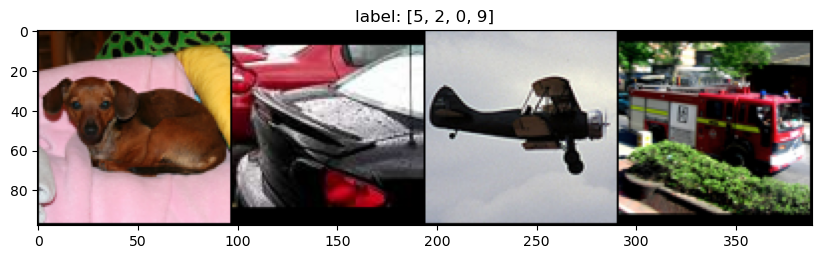

In [15]:
# call helper function
plt.figure(figsize=(10,10))
show(x_grid,y_grid)

image indices: [ 684  559 1216  835]
torch.Size([3, 100, 394])


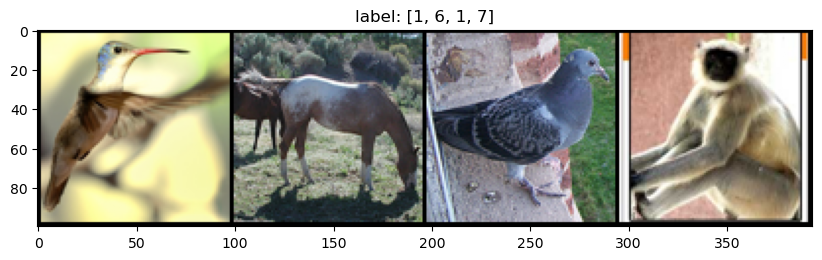

In [16]:
# show sample images from val_ds:
np.random.seed(0) #random.seed can be change to check the other images like 2,3,4 
grid_size=4
rnd_inds=np.random.randint(0,len(val_ds),grid_size)
print("image indices:",rnd_inds)
x_grid=[val_ds[i][0] for i in rnd_inds]
y_grid=[val_ds[i][1] for i in rnd_inds]
x_grid=utils.make_grid(x_grid, nrow=4, padding=2)
print(x_grid.shape)
plt.figure(figsize=(10,10))
show(x_grid,y_grid)

In [17]:
#  calculate the mean and standard deviation of train_ds:
import numpy as np
meanRGB=[np.mean(x.numpy(),axis=(1,2)) for x,_ in train_ds]
stdRGB=[np.std(x.numpy(),axis=(1,2)) for x,_ in train_ds]
meanR=np.mean([m[0] for m in meanRGB])
meanG=np.mean([m[1] for m in meanRGB])
meanB=np.mean([m[2] for m in meanRGB])
stdR=np.mean([s[0] for s in stdRGB])
stdG=np.mean([s[1] for s in stdRGB])
stdB=np.mean([s[2] for s in stdRGB])
print(meanR,meanG,meanB)
print(stdR,stdG,stdB)

0.4467106 0.43980986 0.40664646
0.22414584 0.22148906 0.22389975


In [18]:
# image transformations for train_ds and test0_ds:
train_transformer = transforms.Compose([transforms.RandomHorizontalFlip(p=0.5),
                                        transforms.RandomVerticalFlip(p=0.5),
                                        transforms.ToTensor(), #we applied zero-mean unit-variance normalization using transforms.Normalize
                                        transforms.Normalize([meanR, meanG, meanB], [stdR, stdG,stdB])])
test0_transformer = transforms.Compose([transforms.ToTensor(),
                                        transforms.Normalize([meanR, meanG, meanB], [stdR, stdG,stdB]),
])
# Update the transform functions of train_ds and test0_ds:
train_ds.transform=train_transformer
test0_ds.transform=test0_transformer

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


image indices: [2732 2607 1653 3264]
torch.Size([3, 100, 394])


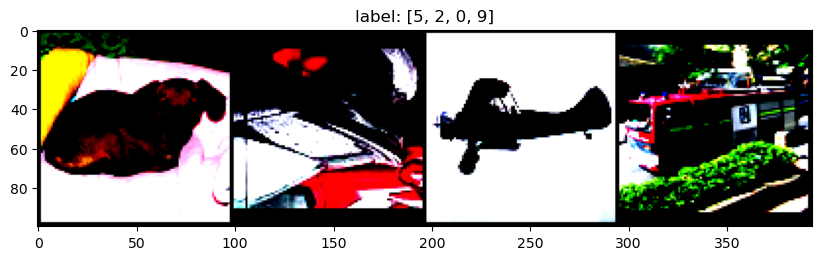

In [19]:
#  transformed sample images from train_ds:
import torch
np.random.seed(0)
torch.manual_seed(0)
grid_size=4
rnd_inds=np.random.randint(0,len(train_ds),grid_size)
print("image indices:",rnd_inds)
x_grid=[train_ds[i][0] for i in rnd_inds]
y_grid=[train_ds[i][1] for i in rnd_inds]
x_grid=utils.make_grid(x_grid, nrow=4, padding=2)
print(x_grid.shape)
plt.figure(figsize=(10,10))
show(x_grid,y_grid)

# Create dataloaders from train_ds and val_ds:

In [20]:
from torch.utils.data import DataLoader
train_dl = DataLoader(train_ds, batch_size=32, shuffle=True)
val_dl = DataLoader(val_ds, batch_size=64, shuffle=False)

In [21]:
# get a batch of data from train_dl:
for x, y in train_dl:
    print(x.shape)
    print(y.shape)
    break

torch.Size([32, 3, 96, 96])
torch.Size([32])


In [22]:
# get a batch of data from val_dl:
for x, y in val_dl:
    print(x.shape)
    print(y.shape)
    break
    

torch.Size([64, 3, 96, 96])
torch.Size([64])


In [23]:
from torchvision import models
import torch
model_resnet18 = models.resnet18(pretrained=False)

C:\ProgramData\anaconda3\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


In [24]:
print(model_resnet18)  # rectified linear activation function (ReLu) used in neural network

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [50]:
from torch import nn
num_classes=10
num_ftrs = model_resnet18.fc.in_features
model_resnet18.fc = nn.Linear(num_ftrs, num_classes)
device = torch.device("cpu:0")
model_resnet18.to(device)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [26]:
from torchsummary import summary
summary(model_resnet18,input_size=(3,224,224), device=device.type)

Layer (type:depth-idx)                   Param #
├─Conv2d: 1-1                            9,408
├─BatchNorm2d: 1-2                       128
├─ReLU: 1-3                              --
├─MaxPool2d: 1-4                         --
├─Sequential: 1-5                        --
|    └─BasicBlock: 2-1                   --
|    |    └─Conv2d: 3-1                  36,864
|    |    └─BatchNorm2d: 3-2             128
|    |    └─ReLU: 3-3                    --
|    |    └─Conv2d: 3-4                  36,864
|    |    └─BatchNorm2d: 3-5             128
|    └─BasicBlock: 2-2                   --
|    |    └─Conv2d: 3-6                  36,864
|    |    └─BatchNorm2d: 3-7             128
|    |    └─ReLU: 3-8                    --
|    |    └─Conv2d: 3-9                  36,864
|    |    └─BatchNorm2d: 3-10            128
├─Sequential: 1-6                        --
|    └─BasicBlock: 2-3                   --
|    |    └─Conv2d: 3-11                 73,728
|    |    └─BatchNorm2d: 3-12            25

Layer (type:depth-idx)                   Param #
├─Conv2d: 1-1                            9,408
├─BatchNorm2d: 1-2                       128
├─ReLU: 1-3                              --
├─MaxPool2d: 1-4                         --
├─Sequential: 1-5                        --
|    └─BasicBlock: 2-1                   --
|    |    └─Conv2d: 3-1                  36,864
|    |    └─BatchNorm2d: 3-2             128
|    |    └─ReLU: 3-3                    --
|    |    └─Conv2d: 3-4                  36,864
|    |    └─BatchNorm2d: 3-5             128
|    └─BasicBlock: 2-2                   --
|    |    └─Conv2d: 3-6                  36,864
|    |    └─BatchNorm2d: 3-7             128
|    |    └─ReLU: 3-8                    --
|    |    └─Conv2d: 3-9                  36,864
|    |    └─BatchNorm2d: 3-10            128
├─Sequential: 1-6                        --
|    └─BasicBlock: 2-3                   --
|    |    └─Conv2d: 3-11                 73,728
|    |    └─BatchNorm2d: 3-12            25

# visualize the filters of the first CNN layer:

In [27]:
# Let's get the weights of the first layer
for w in model_resnet18.parameters():
    w=w.data.cpu()
    print(w.shape)
    break

torch.Size([64, 3, 7, 7])


In [28]:
# normalize the weights:
min_w=torch.min(w)
w1 = (-1/(2*min_w))*w + 0.5
print(torch.min(w1).item(),torch.max(w1).item())

0.0 1.0072150230407715


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([3, 65, 65])


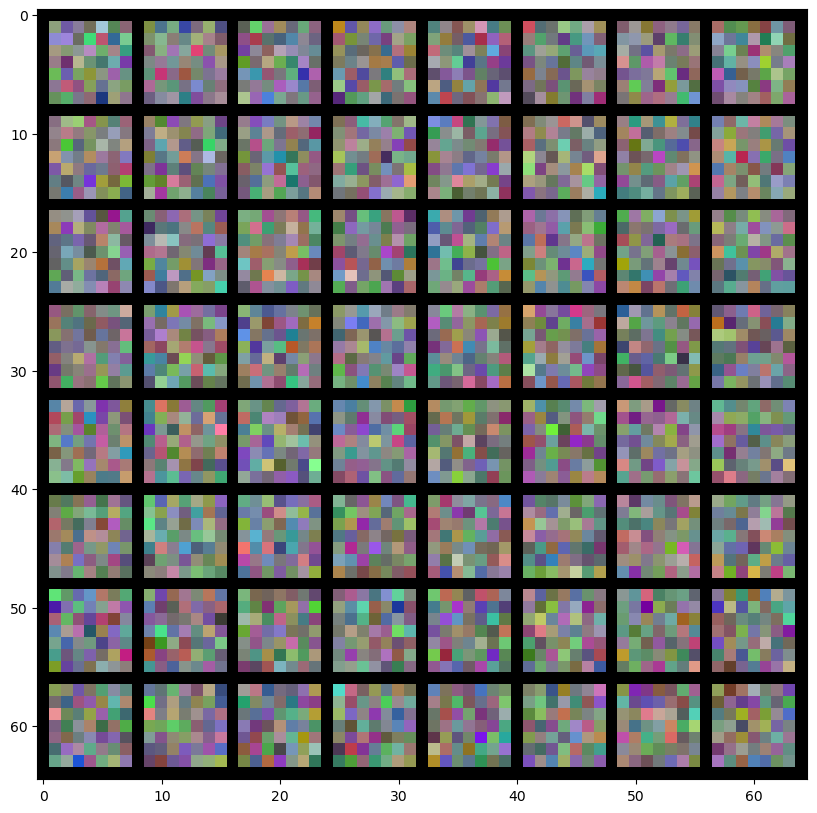

In [29]:
# make a grid and display it:
grid_size=len(w1)
x_grid=[w1[i] for i in range(grid_size)]
x_grid=utils.make_grid(x_grid, nrow=8, padding=1)
print(x_grid.shape)
plt.figure(figsize=(10,10))
show(x_grid)

In [30]:
# Let's load resnet18 with the pre-trained weights:
from torchvision import models
import torch
resnet18_pretrained = models.resnet18(pretrained=True)
num_classes=10
num_ftrs = resnet18_pretrained.fc.in_features
resnet18_pretrained.fc = nn.Linear(num_ftrs, num_classes)
device = torch.device("cpu:0")
resnet18_pretrained.to(device)

C:\ProgramData\anaconda3\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

# Loss Function:
  #### it is used to optimize the model output

In [31]:
loss_func = nn.CrossEntropyLoss(reduction="sum")
torch.manual_seed(0)
n,c=4,5
y = torch.randn(n, c, requires_grad=True)
print(y.shape)
loss_func = nn.CrossEntropyLoss(reduction="sum")
target = torch.randint(c,size=(n,))
print(target.shape)
loss = loss_func(y, target)
print(loss.item())

torch.Size([4, 5])
torch.Size([4])
7.312585830688477


In [32]:
loss.backward()
print (y.data)

tensor([[-1.1258, -1.1524, -0.2506, -0.4339,  0.5988],
        [-1.5551, -0.3414,  1.8530,  0.4681, -0.1577],
        [ 1.4437,  0.2660,  1.3894,  1.5863,  0.9463],
        [-0.8437,  0.9318,  1.2590,  2.0050,  0.0537]])


# Optimizer:

In [33]:
from torch import optim
opt = optim.Adam(model_resnet18.parameters(), lr=1e-4)

In [34]:
def get_lr(opt):
    for param_group in opt.param_groups:
        return param_group['lr']
current_lr=get_lr(opt)
print('current lr={}'.format(current_lr))

current lr=0.0001


In [35]:
from torch.optim.lr_scheduler import CosineAnnealingLR
lr_scheduler = CosineAnnealingLR(opt,T_max=2,eta_min=1e-5)
for i in range(10):
    lr_scheduler.step()
    print("epoch %s, lr: %.1e" %(i,get_lr(opt)))

epoch 0, lr: 5.5e-05
epoch 1, lr: 1.0e-05
epoch 2, lr: 5.5e-05
epoch 3, lr: 1.0e-04
epoch 4, lr: 5.5e-05
epoch 5, lr: 1.0e-05
epoch 6, lr: 5.5e-05
epoch 7, lr: 1.0e-04
epoch 8, lr: 5.5e-05
epoch 9, lr: 1.0e-05


C:\ProgramData\anaconda3\lib\site-packages\torch\optim\lr_scheduler.py:131: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  warnings.warn("Detected call of `lr_scheduler.step()` before `optimizer.step()`. "


# Training and transfer learning:

In [49]:
# step 1:
# count the number of correct predictions per data batch:
def metrics_batch(output, target):
    pred = output.argmax(dim=1, keepdim=True)
    corrects=pred.eq(target.view_as(pred)).sum().item()
    return corrects
# step 2:A helper function to compute the loss value per batch of data:
def loss_batch(loss_func, output, target, opt=None):
    loss = loss_func(output, target)
    metric_b = metrics_batch(output,target)
    if opt is not None:
        opt.zero_grad()
        loss.backward()
        opt.step()
    return loss.item(), metric_b

In [37]:
#  step 3: compute the loss value and the performance metric for the entire dataset or an epoch
def loss_epoch(model,loss_func,dataset_dl,sanity_check=False,opt=None):
    running_loss=0.0
    running_metric=0.0
    len_data=len(dataset_dl.dataset)
    for xb, yb in dataset_dl:
        xb=xb.to(device)
        yb=yb.to(device)
        output=model(xb)
        loss_b,metric_b=loss_batch(loss_func, output, yb, opt)
        running_loss+=loss_b
        if metric_b is not None:
            running_metric+=metric_b
            if sanity_check is True:
                break
    loss=running_loss/float(len_data)
    metric=running_metric/float(len_data)
    return loss, metric

In [ ]:
def train_val(model, params):
    num_epochs=params["num_epochs"]
    loss_func=params["loss_func"]
    opt=params["optimizer"]
    train_dl=params["train_dl"]
    val_dl=params["val_dl"]
    sanity_check=params["sanity_check"]
    lr_scheduler=params["lr_scheduler"]
    path2weights=params["path2weights"]
    loss_history={
        "train": [],
        "val": [],
    }
    metric_history={
        "train": [],
         "val": [],
    }
    import copy
    best_model_wts = copy.deepcopy(model.state_dict())
    best_loss=float('inf')
    for epoch in range(num_epochs):
        current_lr=get_lr(opt)
        print('Epoch {}/{}, current lr={}'.format(epoch, num_epochs- 1, current_lr))
        model.train()
        train_loss,train_metric=loss_epoch(model,loss_func,train_dl,sanity_check,opt)
        loss_history["train"].append(train_loss)
        metric_history["train"].append(train_metric)
        model.eval()
        with torch.no_grad():
            val_loss, val_metric=loss_epoch(model,loss_func,val_dl,sanity_check)
        loss_history["val"].append(val_loss)
        metric_history["val"].append(val_metric)  # loop continues with the best model parameters:
        if val_loss < best_loss:
            best_loss = val_loss
            best_model_wts = copy.deepcopy(model.state_dict())
            torch.save(model.state_dict(), path2weights)
            print("Copied best model weights!")
        lr_scheduler.step()
        print("train loss: %.6f, dev loss: %.6f, accuracy: %.2f" %(train_loss,val_loss,100*val_metric))
        print("-"*10)
    model.load_state_dict(best_model_wts)
    return model, loss_history, metric_history
         


# Let's train the model by calling the train_val function.We will redefine the loss, optimizer, and learning rate schedule:

In [ ]:
import copy
loss_func = nn.CrossEntropyLoss(reduction="sum")
opt = optim.Adam(model_resnet18.parameters(), lr=1e-4)
lr_scheduler = CosineAnnealingLR(opt,T_max=5,eta_min=1e-6)
os.makedirs("D:\\madiha study\\data\\models", exist_ok=True)
params_train={
    "num_epochs": 100,
    "optimizer": opt,
    "loss_func": loss_func,
    "train_dl": train_dl,
    "val_dl": val_dl,
    "sanity_check": False,
    "lr_scheduler": lr_scheduler,
    "path2weights": "D:\\madiha study\\data\\models\\resnet18.pt",
}
model_resnet18,loss_hist,metric_hist=train_val(model_resnet18,params_train)

Epoch 0/99, current lr=0.0001
Copied best model weights!
train loss: 0.400868, dev loss: 0.422050, accuracy: 87.00
----------
Epoch 1/99, current lr=9.05463412215599e-05
train loss: 0.189991, dev loss: 0.462453, accuracy: 86.62
----------
Epoch 2/99, current lr=6.57963412215599e-05


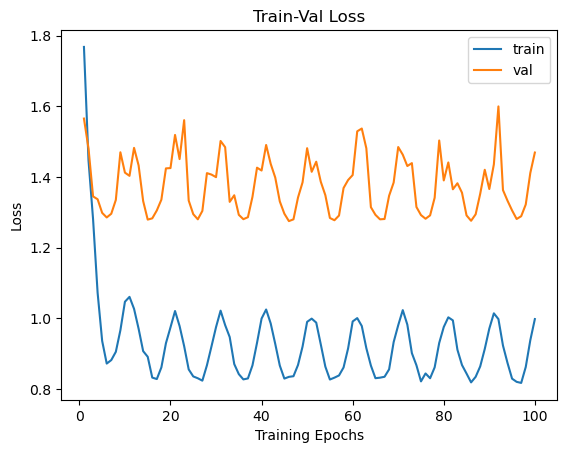

In [40]:
num_epochs=params_train["num_epochs"]
plt.title("Train-Val Loss")
plt.plot(range(1,num_epochs+1),loss_hist["train"],label="train")
plt.plot(range(1,num_epochs+1),loss_hist["val"],label="val")
plt.ylabel("Loss")
plt.xlabel("Training Epochs")
plt.legend()
plt.show()

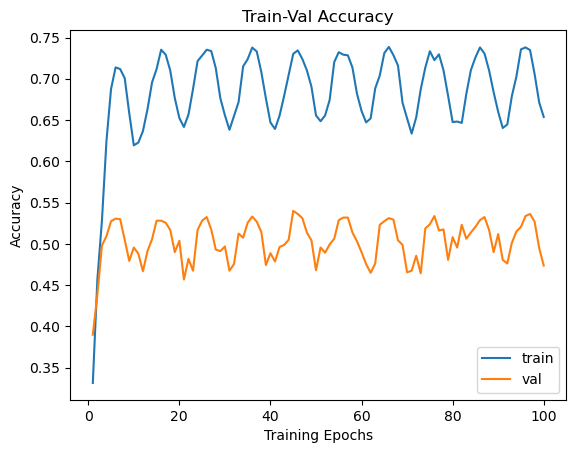

In [41]:
plt.title("Train-Val Accuracy")
plt.plot(range(1,num_epochs+1),metric_hist["train"],label="train")
plt.plot(range(1,num_epochs+1),metric_hist["val"],label="val")
plt.ylabel("Accuracy")
plt.xlabel("Training Epochs")
plt.legend()
plt.show()

# let's train the model with the pre-trained weights:

In [42]:
import copy
loss_func = nn.CrossEntropyLoss(reduction="sum")
opt = optim.Adam(resnet18_pretrained.parameters(), lr=1e-4)
lr_scheduler = CosineAnnealingLR(opt,T_max=5,eta_min=1e-6)
params_train={
    "num_epochs": 100,
    "optimizer": opt,
    "loss_func": loss_func,
    "train_dl": train_dl,
    "val_dl": val_dl,
    "sanity_check": False,
    "lr_scheduler": lr_scheduler,
    "path2weights": "D:\\madiha study\\data\\models\\resnet18_pretrained.pt",
}
resnet18_pretrained,loss_hist,metric_hist=train_val(resnet18_pretrained,params_train)

Epoch 0/99, current lr=0.0001
Copied best model weights!
train loss: 0.903672, dev loss: 0.447737, accuracy: 84.25
----------
Epoch 1/99, current lr=9.05463412215599e-05
Copied best model weights!
train loss: 0.426938, dev loss: 0.388098, accuracy: 86.44
----------
Epoch 2/99, current lr=6.57963412215599e-05
Copied best model weights!
train loss: 0.292536, dev loss: 0.349934, accuracy: 87.94
----------
Epoch 3/99, current lr=3.52036587784401e-05
Copied best model weights!
train loss: 0.202557, dev loss: 0.314841, accuracy: 89.50
----------
Epoch 4/99, current lr=1.0453658778440105e-05
Copied best model weights!
train loss: 0.158723, dev loss: 0.309484, accuracy: 89.62
----------
Epoch 5/99, current lr=1e-06
train loss: 0.153253, dev loss: 0.310769, accuracy: 89.25
----------
Epoch 6/99, current lr=1.0453658778440102e-05
train loss: 0.139506, dev loss: 0.321943, accuracy: 89.62
----------
Epoch 7/99, current lr=3.520365877844009e-05
train loss: 0.143059, dev loss: 0.313671, accuracy: 89

train loss: 0.177494, dev loss: 0.463886, accuracy: 86.06
----------
Epoch 71/99, current lr=9.054634122156027e-05
train loss: 0.164167, dev loss: 0.441718, accuracy: 86.06
----------
Epoch 72/99, current lr=6.579634122156029e-05
train loss: 0.115251, dev loss: 0.346491, accuracy: 88.69
----------
Epoch 73/99, current lr=3.520365877844051e-05
train loss: 0.102747, dev loss: 0.337869, accuracy: 89.00
----------
Epoch 74/99, current lr=1.0453658778440202e-05
train loss: 0.106488, dev loss: 0.308928, accuracy: 89.81
----------
Epoch 75/99, current lr=1e-06
train loss: 0.109174, dev loss: 0.308428, accuracy: 89.31
----------
Epoch 76/99, current lr=1.0453658778440102e-05
train loss: 0.103396, dev loss: 0.310541, accuracy: 89.31
----------
Epoch 77/99, current lr=3.5203658778440356e-05
train loss: 0.108767, dev loss: 0.355556, accuracy: 88.56
----------
Epoch 78/99, current lr=6.579634122156015e-05
train loss: 0.126586, dev loss: 0.369376, accuracy: 88.56
----------
Epoch 79/99, current lr=